# VTune Python wrapper

## Requirements

- python3.5+
- matplotlib, numpy, pandas, treelib
- Intel VTune Profiler
- pdoc (to generate docs)
- inkscape (to save plots in pdf format (the lib first creates a svg file and uses inkscape to convert into pdf))

## Usage example

In [1]:
# import sys
# sys.path.append('/path/to/lib/vtune_wrapper') # If script not in the same directory, specify path to find it
from vtune_wrapper import *

In [2]:
wrapper = VTuneWrapper('/opt/intel/oneapi/vtune/latest') # Specify where VTune is installed
wrapper.set_run_analysis_type(VTuneWrapper.AnalysisType.MICRO_ARCH)
wrapper.set_run_start_paused(False)
wrapper.set_run_summary_only(True) # Summary or detailed mode (log size is smaller in summary, but ITT API calls may not work)
wrapper.set_run_program('/home/fdemoor/intel/vtune/samples/matrix/matrix')
wrapper.set_run_result_dir('/home/fdemoor/Documents/vtune_wrapper/data')
# wrapper.set_run_start_after(1.5) # To start profiling after X seconds (do not forget to combine with start paused)
# wrapper.set_run_stop_after(2.0) # To stop X seconds after collection start

TABLE_DIR = '/home/fdemoor/Documents/vtune_wrapper/data'
table = VTuneResultTable('matrix', TABLE_DIR)
table.set_title('Matrix mult')

wrapper.run_and_add_results_to_table(log_name='r001ue', args='', label='test1', table=table, can_overwrite_results=True)
wrapper.run_and_add_results_to_table(log_name='r002ue', args='', label='test2', table=table, can_overwrite_results=True)

[2023-10-10 17:24:31 - VTuneWrapper - WARNING] ITT API calls may not work properly when using VTune summary mode
[2023-10-10 17:24:31 - VTuneWrapper - INFO] Result path /home/fdemoor/Documents/vtune_wrapper/data/r001ue already exists
[2023-10-10 17:24:31 - VTuneWrapper - INFO] Can overwrite: will delete old dir
[2023-10-10 17:24:31 - VTuneWrapper - INFO] vtune -collect uarch-exploration -knob pmu-collection-mode=summary  -quiet -no-summary -result-dir=/home/fdemoor/Documents/vtune_wrapper/data/r001ue -- /home/fdemoor/intel/vtune/samples/matrix/matrix 
Addr of buf1 = 0x7ff4db141010
Offs of buf1 = 0x7ff4db141180
Addr of buf2 = 0x7ff4d9140010
Offs of buf2 = 0x7ff4d91401c0
Addr of buf3 = 0x7ff4d713f010
Offs of buf3 = 0x7ff4d713f100
Addr of buf4 = 0x7ff4d513e010
Offs of buf4 = 0x7ff4d513e140
Threads #: 8 Pthreads
Matrix size: 2048
Using multiply kernel: multiply2
Execution time = 1.986 seconds
[2023-10-10 17:24:38 - VTuneWrapper - INFO] Result path /home/fdemoor/Documents/vtune_wrapper/data

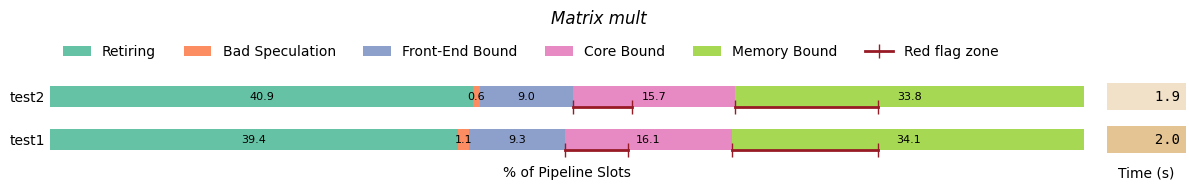

In [3]:
table.plot(save_pdf=False, save_png=False, save_svg=False, no_view=False)

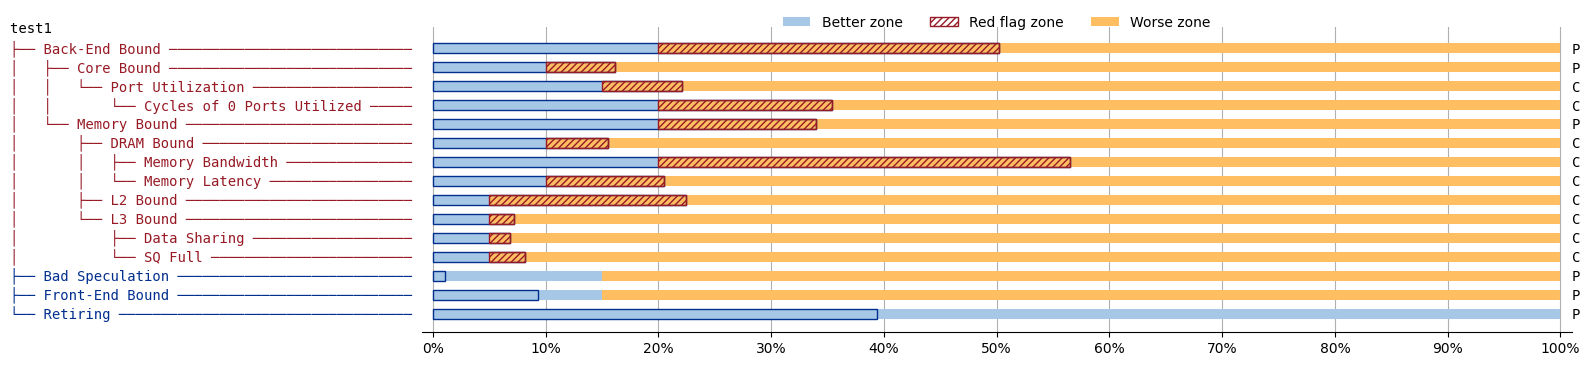

In [5]:
wrapper.print_red_flagged_metrics(table, labels=['test1'], show_all_metrics=False) # Leave labels empty to plot all logs

The table plotter can also be used in command line

In [3]:
!./vtune_table_plot.py -h

usage: vtune_table_plot.py [-h] [--no-view] [--save [{pdf,svg,png} ...]]
                           [--vtlog] [--print]
                           dir table

Plot VTune results from a csv table

positional arguments:
  dir                   Input and output directory
  table                 Table name (without extension)

options:
  -h, --help            show this help message and exit
  --no-view             Do not show the plot with the matplotlib viewer
  --save [{pdf,svg,png} ...]
                        Save the plot in specified format
  --vtlog               Write VTune log names in the plot labels
  --print               Print the data table


## API Docs

Open `./docs/index.html` in your browser.

Use `./gen_docs.sh` to regenerate the docs (requires `pdoc`).


## Limitations

The file `vtune_red_flag_thresholds.json` is not complete since I did not find an easy way to get all thresholds from `vtune` command line or installation files. The file is crafted manually by reporting the thresholds visible in the VTune GUI. If you notice a bar going below 0 in the red flagged metrics plot, it means the threshold is missing. You can add the threshold to the json file and plot again.